## Milestone - 2 :: Prior Evaluation & Feature Selection:

### Index: 
- **Importing required libraries**
- **Data pre-processing**
- **EDA & Feature Selection for numerical variables**
    - Correlation of numerical heatmap
    - Spearman's Correlation
- **EDA & Feature Selection for Categorical Variables**
    - Correlation of categorical heatmap
    - Text cleanig to build worldcloud for real & fake jobs
    - Principal Component Analysis (**PCA**) for Dimensionality Reduction

In [1]:
#imports
import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
color = sns.color_palette()
import missingno as ms
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import warnings
from scipy.stats import spearmanr

warnings.filterwarnings('ignore')

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'



### Data Pre-processing:

In [2]:
# Get data from local
data=pd.read_csv('fake_job_postings.csv')
data_tex=pd.read_csv('fake_job_postings.csv')
data.location = data.location.fillna('blank')

#Print first 3 rows of data
data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#Show datatype
data.dtypes.to_frame()

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [4]:
#Dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Statistical Description of the dataset

data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


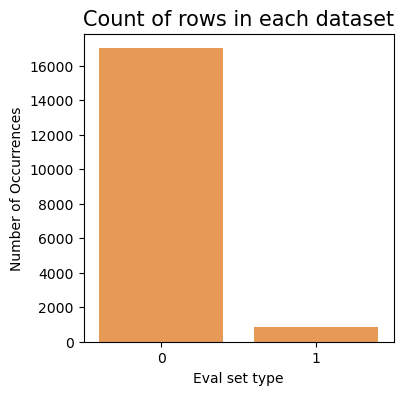

In [6]:
count = data.fraudulent.value_counts()

plt.figure(figsize=(4,4))
sns.barplot(count.index, count.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Eval set type', fontsize=10)
plt.title('Count of rows in each dataset', fontsize=15)
plt.show()

____________________________________________________________________

#### Missing Values:

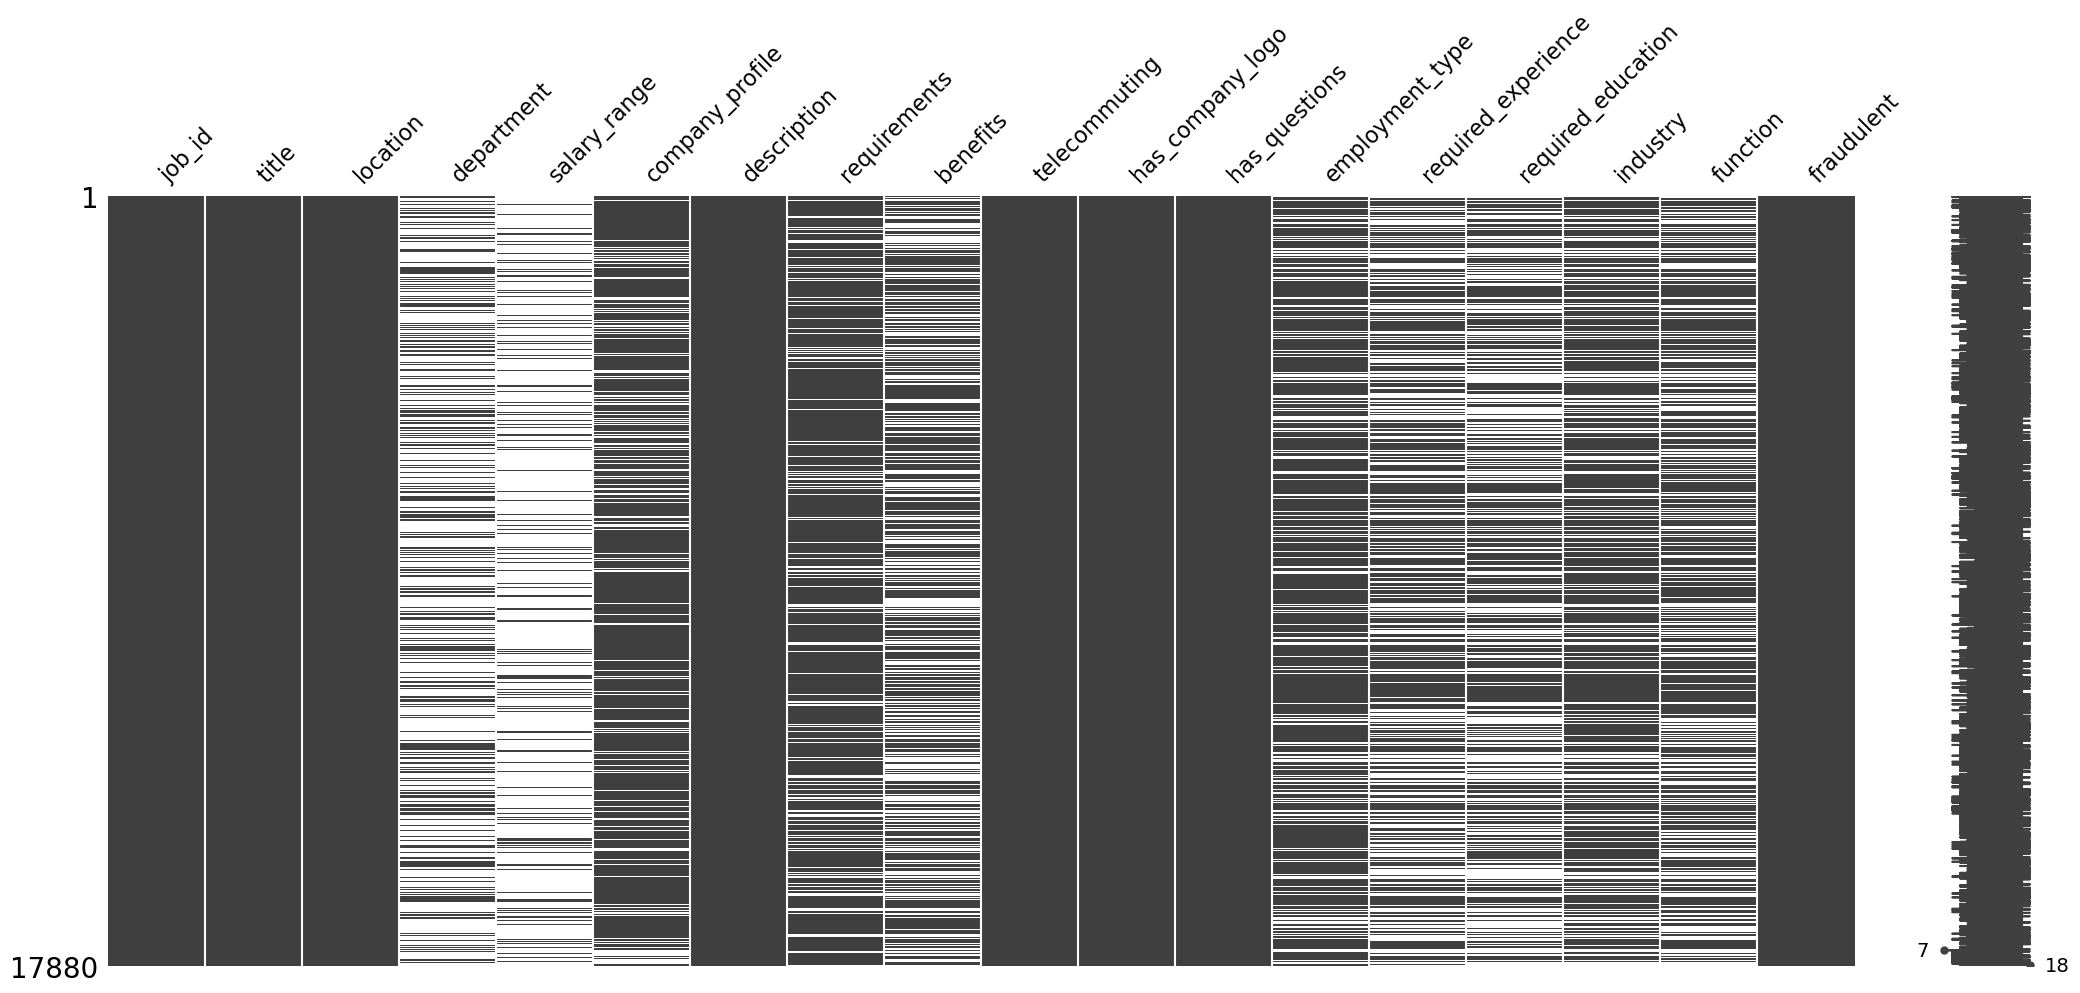

In [7]:
#Visualisation of the missing value in the entire dataset

ms.matrix(data)
plt.show()

In [8]:
# View percentage of missing values in each column
missing_percentage = round(data.isna().sum() * 100 / data.shape[0], 3).sort_values() 

missing_percentage

job_id                  0.000
has_questions           0.000
has_company_logo        0.000
telecommuting           0.000
fraudulent              0.000
location                0.000
title                   0.000
description             0.006
requirements           15.073
company_profile        18.501
employment_type        19.413
industry               27.422
function               36.102
required_experience    39.430
benefits               40.324
required_education     45.330
department             64.581
salary_range           83.960
dtype: float64

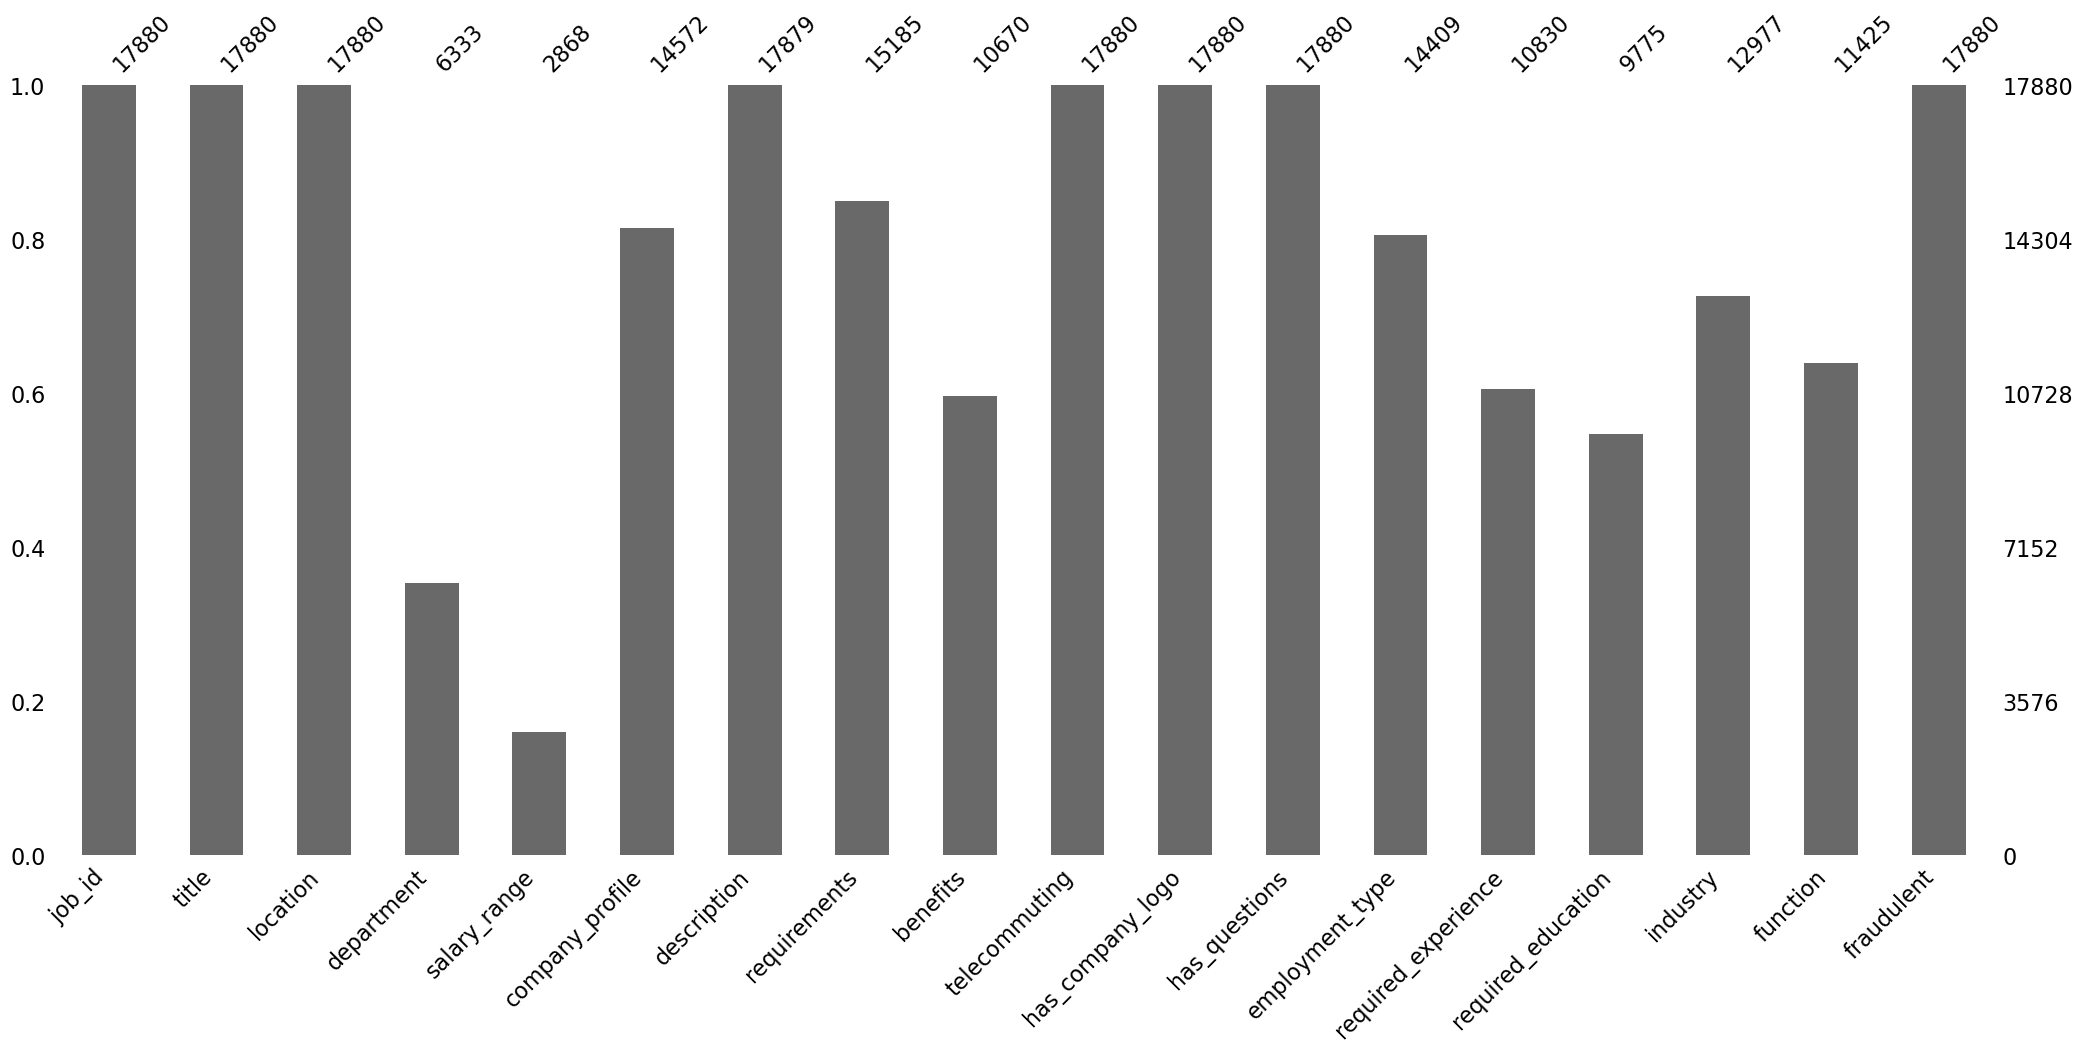

In [9]:
#missing value count plotted

ms.bar(data)

plt.show()

In [10]:
# Number of null values in each column

columns = list(data.columns)
null_columns = dict()
type_null_columns = list()
for values in columns:
    null_values = data[values].isnull().sum()
    if null_values > 0:
        null_columns[values] = null_values
        type_null_columns.append(type(data[values][0]))
    print("Number of nan values in %s is %d"%(values,null_values))

Number of nan values in job_id is 0
Number of nan values in title is 0
Number of nan values in location is 0
Number of nan values in department is 11547
Number of nan values in salary_range is 15012
Number of nan values in company_profile is 3308
Number of nan values in description is 1
Number of nan values in requirements is 2695
Number of nan values in benefits is 7210
Number of nan values in telecommuting is 0
Number of nan values in has_company_logo is 0
Number of nan values in has_questions is 0
Number of nan values in employment_type is 3471
Number of nan values in required_experience is 7050
Number of nan values in required_education is 8105
Number of nan values in industry is 4903
Number of nan values in function is 6455
Number of nan values in fraudulent is 0


In [11]:
#Number of unique values in each column 

for values in columns:
    print("Number of unique values in %s is %d"%(values,data[values].nunique()))

Number of unique values in job_id is 17880
Number of unique values in title is 11231
Number of unique values in location is 3106
Number of unique values in department is 1337
Number of unique values in salary_range is 874
Number of unique values in company_profile is 1709
Number of unique values in description is 14801
Number of unique values in requirements is 11968
Number of unique values in benefits is 6205
Number of unique values in telecommuting is 2
Number of unique values in has_company_logo is 2
Number of unique values in has_questions is 2
Number of unique values in employment_type is 5
Number of unique values in required_experience is 7
Number of unique values in required_education is 13
Number of unique values in industry is 131
Number of unique values in function is 37
Number of unique values in fraudulent is 2


In [12]:
#Display total count of null values in each column 

print(null_columns)

{'department': 11547, 'salary_range': 15012, 'company_profile': 3308, 'description': 1, 'requirements': 2695, 'benefits': 7210, 'employment_type': 3471, 'required_experience': 7050, 'required_education': 8105, 'industry': 4903, 'function': 6455}


In [13]:
#Display data type of null valued columns

print(type_null_columns)

[<class 'str'>, <class 'float'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'float'>, <class 'str'>]


## 1. Feature Selection based on Numerical Variables:

#### Exploratory Data analysis for Numerical Variables

In [14]:
# preapre a list of cloumns which can be deleted 

length_of_dataset = len(data)
drop_list = list()
for key,value in null_columns.items():
    if value > int(length_of_dataset * 10 /100):
        print(key,":",value)
        drop_list.append(key)

department : 11547
salary_range : 15012
company_profile : 3308
requirements : 2695
benefits : 7210
employment_type : 3471
required_experience : 7050
required_education : 8105
industry : 4903
function : 6455


In [15]:
#Dropping null valued columns

for values in drop_list:
    data = data.drop(values,axis = 1)

In [16]:
#Display the dataset

data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,Marketing Intern,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [17]:

null_list = list(null_columns.keys())
remaining_list = [item for item in null_list if item not in drop_list]
print(remaining_list)

['description']


In [18]:
data = data.dropna()

In [19]:
data.isna().sum()

job_id              0
title               0
location            0
description         0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [20]:
mapping = {k: v for v, k in enumerate(data.title.unique())}
data['title'] = data.title.map(mapping)
data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,1,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,2,"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,0
3,4,3,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,4,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [21]:
mapping = {k: v for v, k in enumerate(data.location.unique())}
data['location'] = data.location.map(mapping)
data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,1,1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,2,2,"Our client, located in Houston, is actively se...",0,1,0,0
3,4,3,3,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,4,4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [22]:
data = data.drop('description',axis = 1)

In [23]:
data.head()

,job_id,title,location,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,0,0,1,0,0
1,2,1,1,0,1,0,0
2,3,2,2,0,1,0,0
3,4,3,3,0,1,0,0
4,5,4,4,0,1,1,0


### a. Correlation Matrix of dataset:

In [24]:
# The correlation matrix that shows the pairwise correlations between all the variables in a dataset. Each entry in the matrix represents the correlation coefficient between two variables
# Range -1 to 1: 
# -1 represents perfect negative correlation 
# 0 indicates no correlation,
# 1 indicates a perfect positive correlation

cor = data.corr()
cor

,job_id,title,location,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,0.614146,0.183142,-0.004540,-0.014359,-0.086943,0.079510
title,0.614146,1.000000,0.109029,-0.006577,0.020294,-0.031143,0.053039
location,0.183142,0.109029,1.000000,-0.014277,-0.055611,-0.013518,0.079014
telecommuting,-0.004540,-0.006577,-0.014277,1.000000,-0.019862,0.020334,0.034594
has_company_logo,-0.014359,0.020294,-0.055611,-0.019862,1.000000,0.233855,-0.261655
has_questions,-0.086943,-0.031143,-0.013518,0.020334,0.233855,1.000000,-0.091436
fraudulent,0.079510,0.053039,0.079014,0.034594,-0.261655,-0.091436,1.000000


<AxesSubplot:>

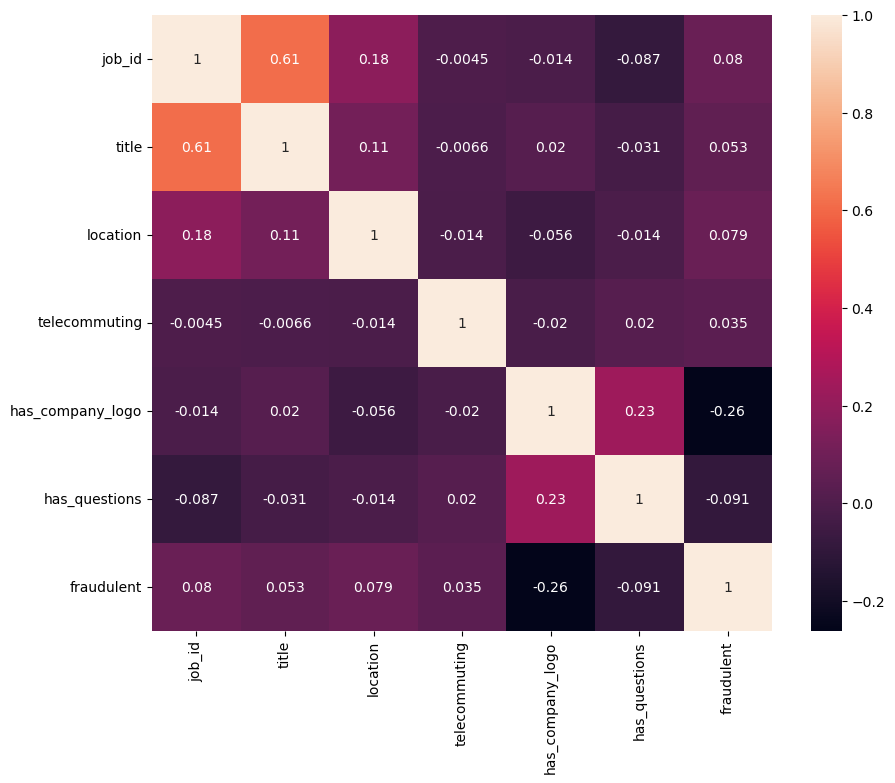

In [25]:
#Plotting correlation matrix for above data:

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

### b. Spearman's rank correlation: 

In [26]:
#sampling the data from dataset

sample_size = 5000
data_sample = data.sample(sample_size)

In [27]:
data_sample.columns

Index(['job_id', 'title', 'location', 'telecommuting', 'has_company_logo',
       'has_questions', 'fraudulent'],
      dtype='object')

In [28]:
#Defining variables for correlation:

var1 = 'job_id'
var2 = 'location'

In [29]:
#Using spearman library to calculate spearman's coefficient and p value:

corr_coef, p_value = spearmanr(data_sample[var1], data_sample[var2])
print(f"Spearman's rank correlation coefficient: {corr_coef:.3f}")
print(f"p-value: {p_value:.3f}")

Spearman's rank correlation coefficient: 0.093
p-value: 0.000


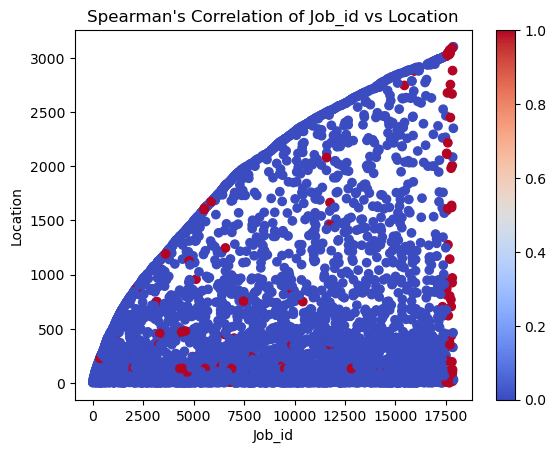

In [30]:
#Plotting Spearman's correlation between job_id vs location:

plt.scatter(data_sample[var1], data_sample[var2], c=data_sample['fraudulent'], cmap='coolwarm')
plt.colorbar()
plt.title(f"Spearman's Correlation of {var1.capitalize()} vs {var2.capitalize()}")
plt.xlabel(var1.capitalize())
plt.ylabel(var2.capitalize())
plt.show()

_______________________________________

## Feature selection based on Categorical variables:

#### Text Based EDA:

In [31]:
data_tex.shape

(17880, 18)

In [32]:
data_tex.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [33]:
data_tex.describe().T

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [34]:
data_tex.duplicated().sum()

0

In [35]:
data_tex.isnull().sum()/len(data)*100

job_id                  0.000000
title                   0.000000
location                1.935231
department             64.584149
salary_range           83.964428
company_profile        18.502153
description             0.005593
requirements           15.073550
benefits               40.326640
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.413837
required_experience    39.431736
required_education     45.332513
industry               27.423234
function               36.103809
fraudulent              0.000000
dtype: float64

- Department, salary_range, company_profile, requirements, benefits, employment_type, required_experience, required_education, industry, function columns have very high percentage of missing value

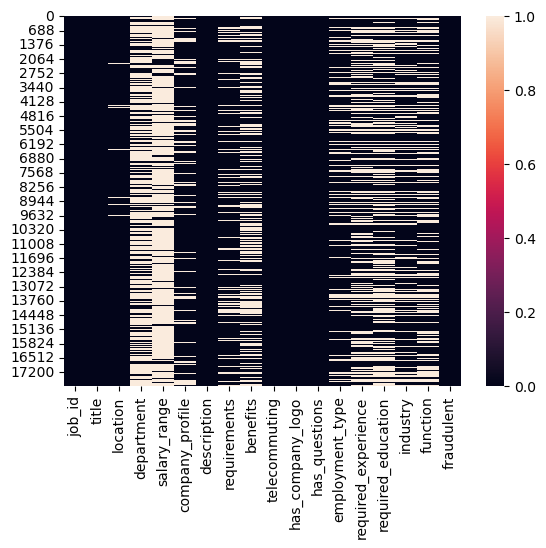

In [36]:
#Overall heat map of dataset

sns.heatmap(data_tex.isnull());

In [37]:
#dropping necessary data

text_data=data_tex.select_dtypes(include="object")
text_data.drop(["location","salary_range"],axis=1,inplace=True)

text_col=text_data.columns

In [38]:
# Replacing the missing data with empty string

data_tex[text_col]=data_tex[text_col].replace(np.nan,"")

In [39]:
# data_tex["text"] Containing all the information provided in job ads

data_tex["text"]=""

In [40]:
for col in text_data.columns:
    data_tex["text"]=data_tex["text"]+" "+data_tex[col]

In [41]:
data_tex["text"].iloc[0]

" Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sou

In [42]:
def fea(text):
    if text=="":
        return 0
    else:
        return 1

for col in text_col:
    data_tex[col]=data_tex[col].apply(fea)

In [43]:
#cleaning unnecessary data

data_tex.isnull().sum()/len(data)*100

job_id                  0.000000
title                   0.000000
location                1.935231
department              0.000000
salary_range           83.964428
company_profile         0.000000
description             0.000000
requirements            0.000000
benefits                0.000000
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type         0.000000
required_experience     0.000000
required_education      0.000000
industry                0.000000
function                0.000000
fraudulent              0.000000
text                    0.000000
dtype: float64

In [44]:
data_tex.drop(["salary_range","job_id"],axis=1,inplace=True)

In [45]:
# Dropping the remaining missing values which are less (2%)

data_tex.dropna(axis=0,inplace=True)

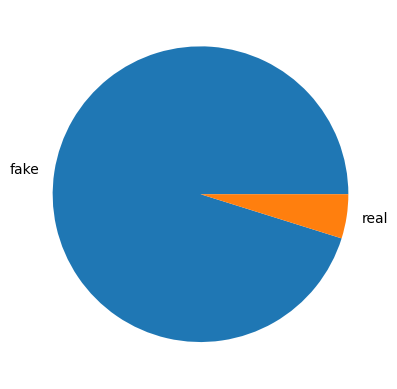

In [46]:
#defining fake and real postings and plotting pie view

fake=data_tex[data_tex["fraudulent"]==0]["fraudulent"].count()
real=data_tex[data_tex["fraudulent"]==1]["fraudulent"].count()

plt.pie([fake,real],labels=["fake","real"]);

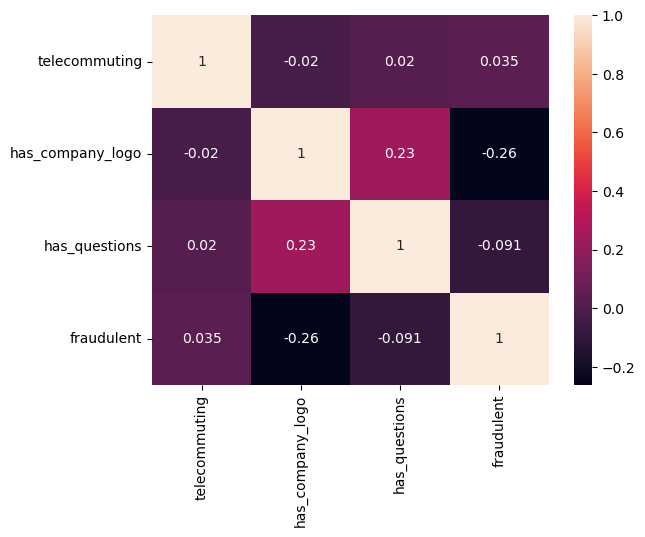

In [47]:
#Plotting correlation between key variables

sns.heatmap(data[["telecommuting","has_company_logo","has_questions","fraudulent"]].corr(),annot=True);

In [48]:
features=['title','department', 'company_profile', 'requirements','description',
          'benefits', 'employment_type', 'required_experience',
          'required_education', 'industry', 'function','fraudulent']

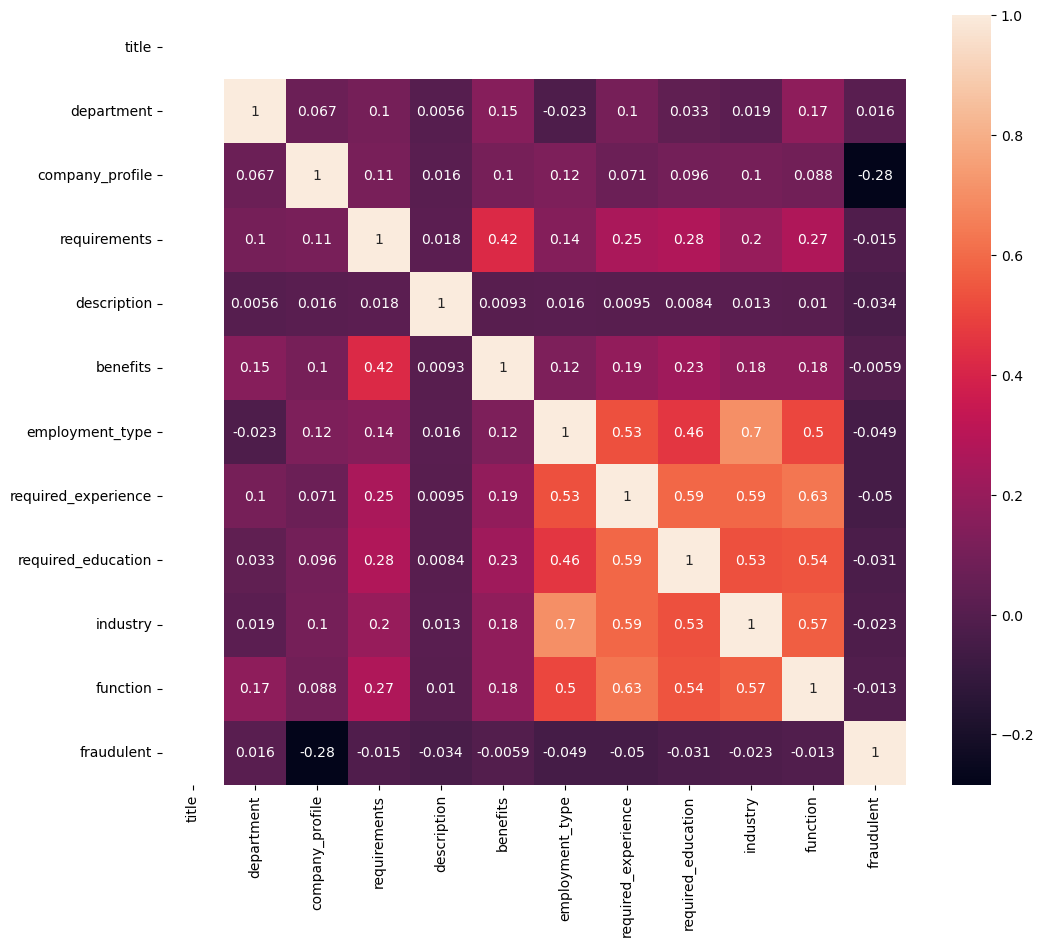

In [49]:
#Plotting Correlation heat map for categorical variables

plt.figure(figsize=(12,10))
sns.heatmap(data_tex[features].corr(),annot=True);

Company profile information is strongly correlated with the job label, while others don't have significant correlation and therefore droping them

In [50]:
#Dropping unnecessary data

drop_col=['title','department', 'description', 'requirements',
          'benefits', 'employment_type', 'required_experience',
          'required_education', 'industry', 'function']

data_tex.drop(drop_col,axis=1,inplace=True)

Location information: using only country code

#### Text Cleaning: 

In [51]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

In [52]:
stop=set(stopwords.words("english"))

In [53]:
data_tex["text"].iloc[0]

" Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sou

In [54]:
#Function to clean and format the text data

def clean(text):
    
    text=text.lower()
    obj=re.compile(r"<.*?>")                     #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+")    #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]")                   #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}")                    #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+")                        #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s\w\s")                    #removing single character
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}")                    #removing multiple spaces
    text=obj.sub(r" ",text)
   
    
    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]
    
    return " ".join(text)

In [55]:
data_tex["text"]=data_tex["text"].apply(clean)

In [56]:
data_tex["text"].iloc[0]

'market intern market food creat groundbreak award win cook site support connect celebr home cook give everyth need one place top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb high curat inform food cook attract talent home cook contributor countri also publish well known profession like mario batali gwyneth paltrow danni meyer partnership whole food market random hous food name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today show locat chelsea new york citi food fast grow jame beard award win onlin food communiti crowd sourc curat recip hub current interview full part time unpaid intern work small team editor execut develop new york citi headquart reproduc repackag exist food content number partner site huffington post yahoo buzzfe various content manag systemsresearch blog websit provis food affili programassist day day affili program support screen affili assist af

In [57]:
#Importing worldcloud and stopwords packages

from wordcloud import WordCloud,STOPWORDS
from collections import defaultdict
from nltk import ngrams

In [58]:
def generate(text,ngram):
    n_grams=ngrams(word_tokenize(text),ngram)
    grams=[" ".join(val) for val in n_grams]
    return grams

In [59]:
# Steps below indicate the real words detected in real posting.

real_job=data_tex[data_tex["fraudulent"]==1]["text"].values

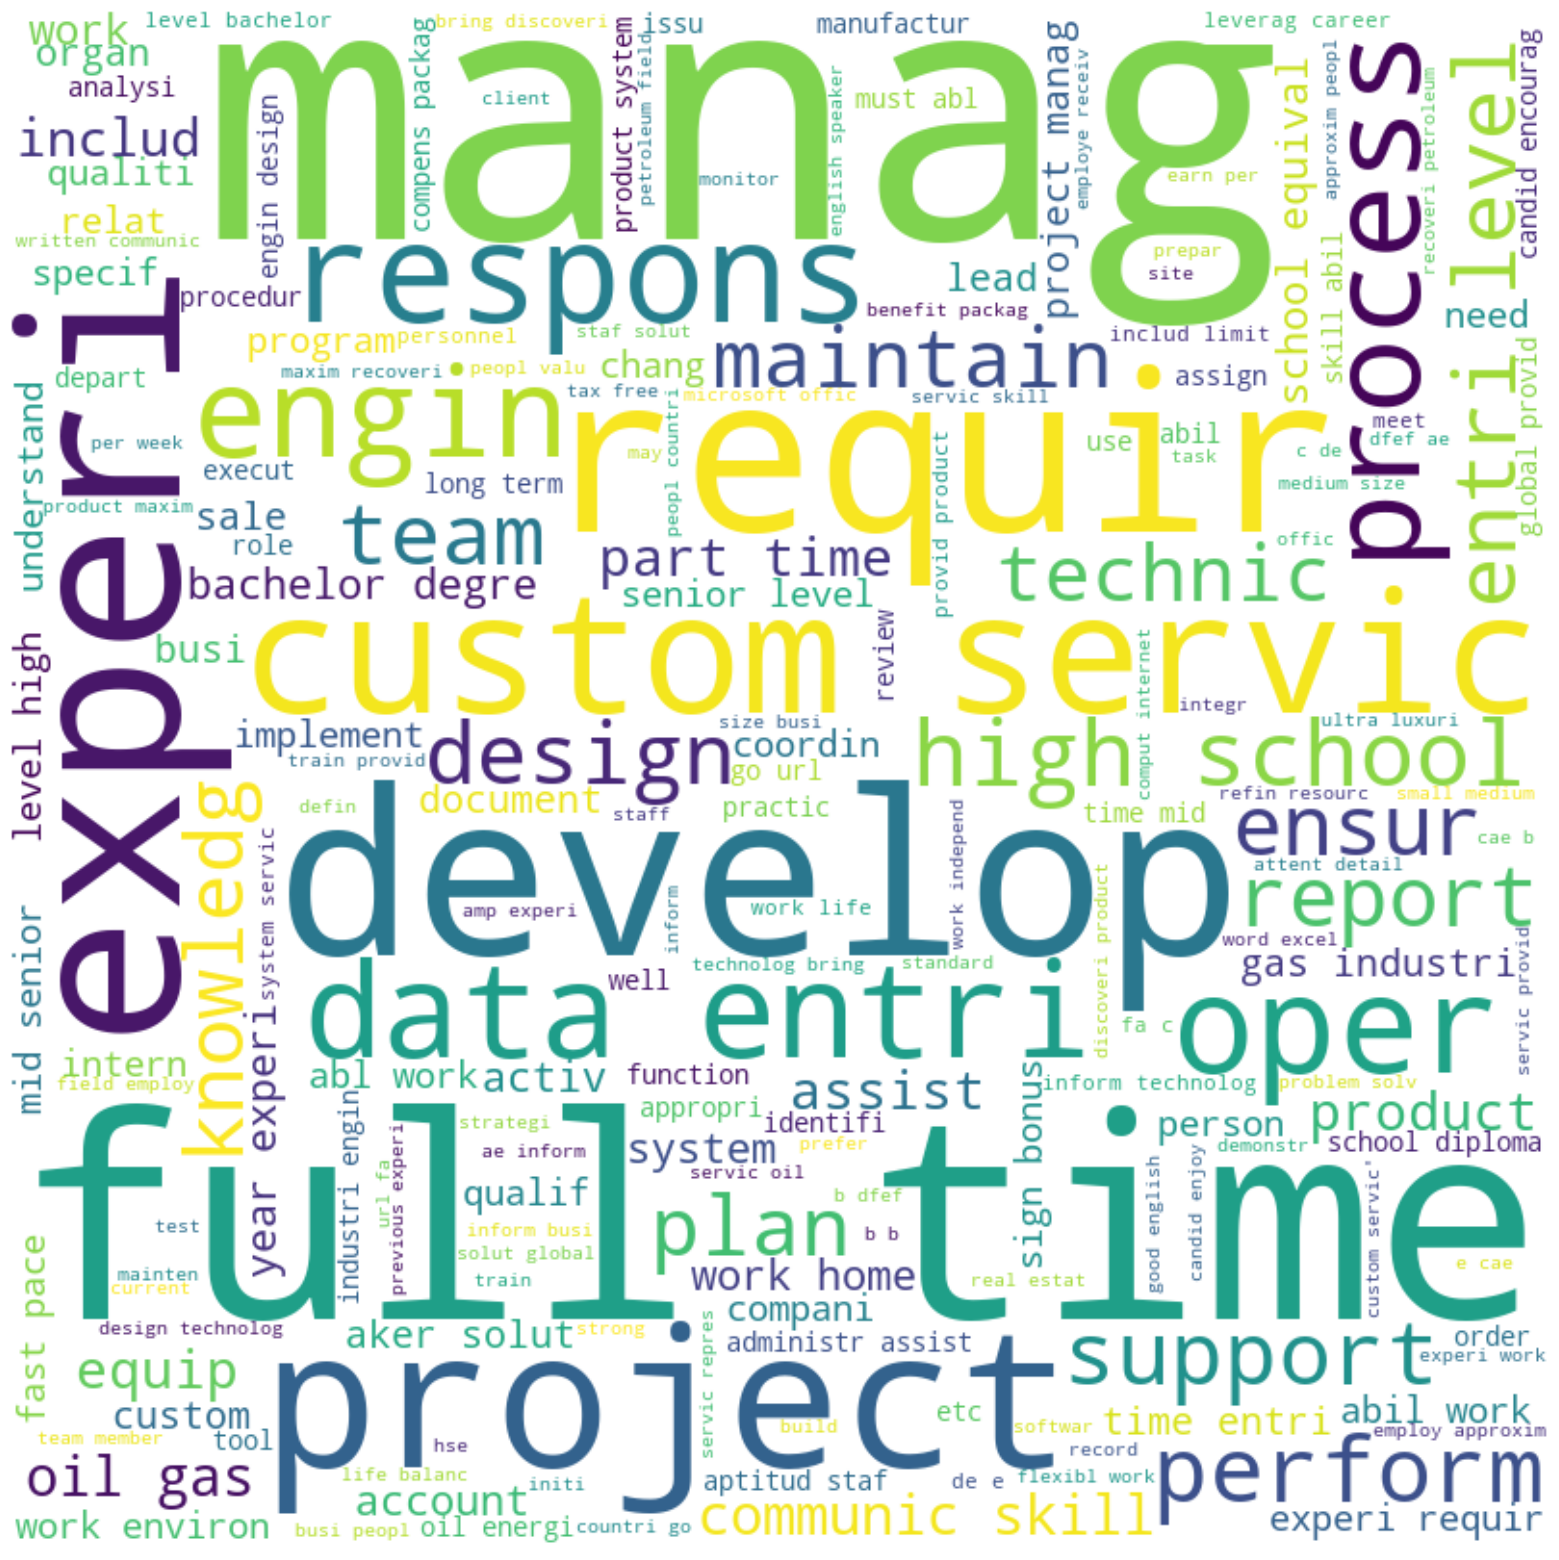

In [60]:
#Plotting world cloud 

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS).generate(str(real_job))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off');


In [61]:
# Steps below indicate the fraudulent words detected

fake_job=data_tex[data_tex["fraudulent"]==0]["text"].values

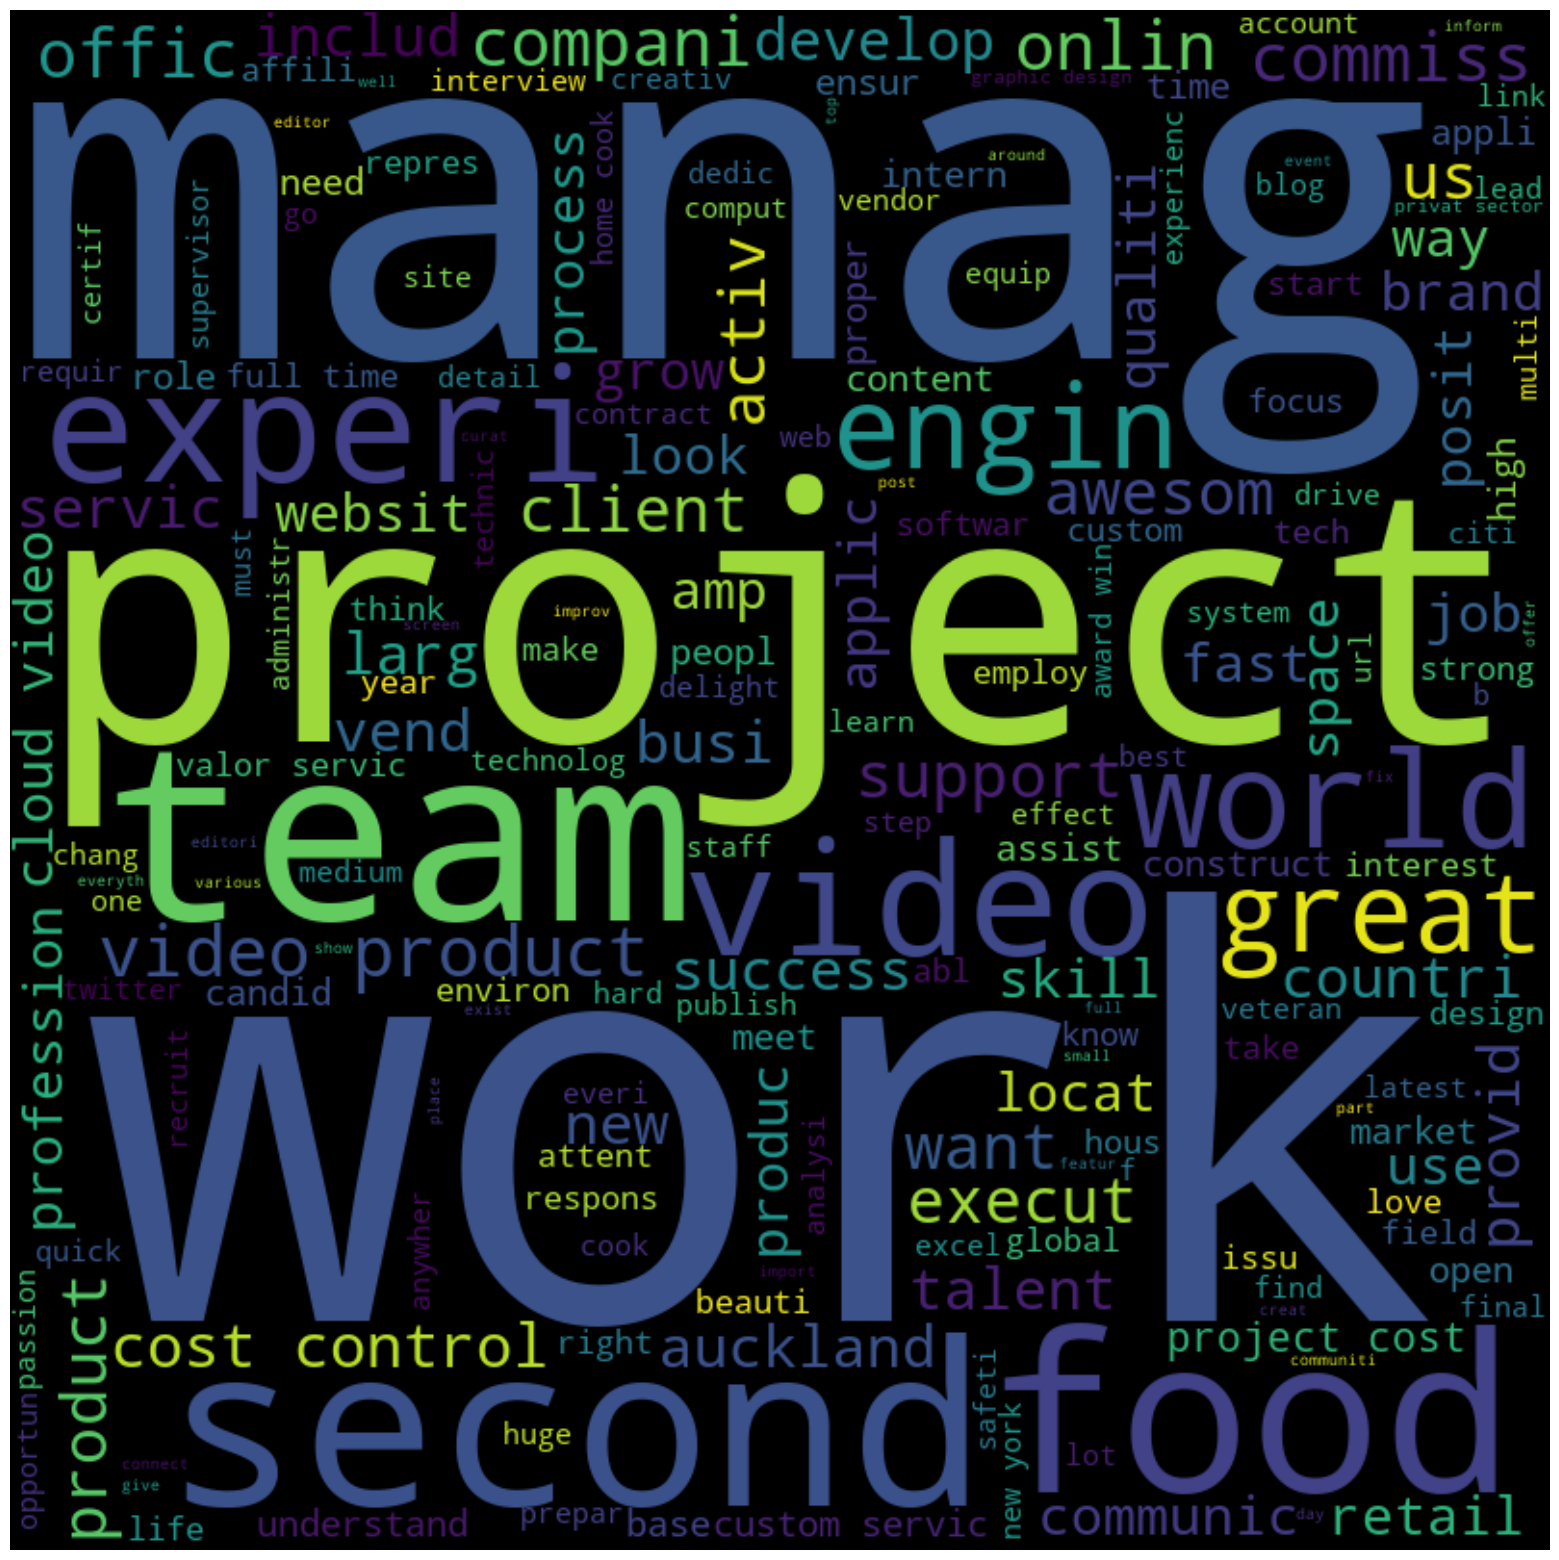

In [62]:
#Plotting lemmztizer using world cloud 

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(str(fake_job))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off');

### Principal Component Analysis (PCA) for Dimensionality Reduction:

In [63]:
#Importing PCA and TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

vectorizer=TfidfVectorizer(strip_accents='unicode',
                           analyzer='word',
                           ngram_range=(1, 2),
                           max_features=15000,
                           smooth_idf=True,
                           sublinear_tf=True)

vectorizer.fit(data_tex["text"])
X = vectorizer.transform(data_tex["text"])

In [64]:
X.shape

(17534, 15000)

In [65]:
pca = PCA(n_components=0.95)

X = pca.fit_transform(X.toarray())

In [66]:
X.shape

(17534, 4503)

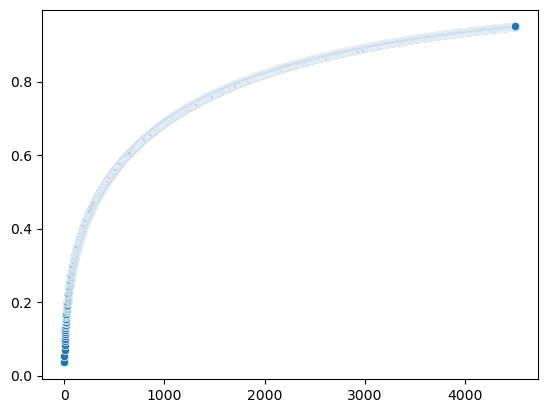

In [67]:
x=range(1,X.shape[1]+1)
cumsum = np.cumsum(pca.explained_variance_ratio_)

sns.scatterplot(x,y=cumsum);


Scatter plot shows that, reducing the dimensionality of a dataset using PCA, reduced the number of features and removing any correlations between them. This helps to analyze and improve the performance of machine learning models.